## Import packages 

In [1]:
from utils.create_features_utils import *
import pandas as pd
import numpy as np
from keras import models, layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras import metrics
from keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

Using TensorFlow backend.


## Read match data with features

In [2]:
df = pd.read_csv('data/wimbledon_matches_with_feature.csv')

df = df.dropna()

df['diff_rank'] = df['player_0_rank'] - df['player_1_rank']

## List of features

In [3]:
features_list = [
 'diff_rank',
 'diff_match_win_percent',
 'diff_games_win_percent',
 'diff_5_set_match_win_percent',
 'diff_close_sets_percent',
 'diff_match_win_percent_grass',
 'diff_games_win_percent_grass',
 'diff_5_set_match_win_percent_grass',
 'diff_close_sets_percent_grass',
 'diff_match_win_percent_52',
 'diff_games_win_percent_52',
 'diff_5_set_match_win_percent_52',
 'diff_close_sets_percent_52',
 'diff_match_win_percent_grass_60',
 'diff_games_win_percent_grass_60',
 'diff_5_set_match_win_percent_grass_60',
 'diff_close_sets_percent_grass_60',
 'diff_match_win_percent_hh',
 'diff_games_win_percent_hh',
 'diff_match_win_percent_grass_hh',
 'diff_games_win_percent_grass_hh']

## Split Data intro Train (80 %) and Test (20%)

In [4]:
target = df.outcome
features = df[features_list]

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.20, random_state=1)

## Build the neural network. 
### Deatils
    - Number of Layers: 3. (2 Hidden Layers)
    - Number of Neuros in each layer: 64->32->1
    - Activation relu->relu->sigmoid
    - Stop if validation loss does not improve for 500 epochs
    - Save the best model which gives the maximum validation accuracy. 

In [16]:
network = models.Sequential()
network.add(layers.Dense(units=64, activation='relu', input_shape=(len(features.columns),)))
network.add(layers.Dense(units=32, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))

network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=500)
mc = ModelCheckpoint('data/best_model.h5', monitor='val_loss', mode='min', verbose=2, save_best_only=True)

history = network.fit(train_features, train_target, 
            epochs=1000, verbose=0, batch_size=128, 
            validation_data=(test_features, test_target), callbacks=[es, mc]) 

saved_model = load_model('data/best_model.h5')


Epoch 00001: val_loss improved from inf to 1.01220, saving model to data/best_model.h5

Epoch 00002: val_loss improved from 1.01220 to 0.74111, saving model to data/best_model.h5

Epoch 00003: val_loss improved from 0.74111 to 0.59638, saving model to data/best_model.h5

Epoch 00004: val_loss improved from 0.59638 to 0.58749, saving model to data/best_model.h5

Epoch 00005: val_loss improved from 0.58749 to 0.56428, saving model to data/best_model.h5

Epoch 00006: val_loss did not improve from 0.56428

Epoch 00007: val_loss improved from 0.56428 to 0.54998, saving model to data/best_model.h5

Epoch 00008: val_loss improved from 0.54998 to 0.54564, saving model to data/best_model.h5

Epoch 00009: val_loss improved from 0.54564 to 0.54090, saving model to data/best_model.h5

Epoch 00010: val_loss did not improve from 0.54090

Epoch 00011: val_loss improved from 0.54090 to 0.53330, saving model to data/best_model.h5

Epoch 00012: val_loss improved from 0.53330 to 0.53126, saving model to


Epoch 00157: val_loss did not improve from 0.49431

Epoch 00158: val_loss did not improve from 0.49431

Epoch 00159: val_loss did not improve from 0.49431

Epoch 00160: val_loss did not improve from 0.49431

Epoch 00161: val_loss did not improve from 0.49431

Epoch 00162: val_loss did not improve from 0.49431

Epoch 00163: val_loss did not improve from 0.49431

Epoch 00164: val_loss did not improve from 0.49431

Epoch 00165: val_loss did not improve from 0.49431

Epoch 00166: val_loss did not improve from 0.49431

Epoch 00167: val_loss did not improve from 0.49431

Epoch 00168: val_loss did not improve from 0.49431

Epoch 00169: val_loss did not improve from 0.49431

Epoch 00170: val_loss did not improve from 0.49431

Epoch 00171: val_loss did not improve from 0.49431

Epoch 00172: val_loss did not improve from 0.49431

Epoch 00173: val_loss did not improve from 0.49431

Epoch 00174: val_loss did not improve from 0.49431

Epoch 00175: val_loss did not improve from 0.49431

Epoch 00176


Epoch 00323: val_loss did not improve from 0.49431

Epoch 00324: val_loss did not improve from 0.49431

Epoch 00325: val_loss did not improve from 0.49431

Epoch 00326: val_loss did not improve from 0.49431

Epoch 00327: val_loss did not improve from 0.49431

Epoch 00328: val_loss did not improve from 0.49431

Epoch 00329: val_loss did not improve from 0.49431

Epoch 00330: val_loss did not improve from 0.49431

Epoch 00331: val_loss did not improve from 0.49431

Epoch 00332: val_loss did not improve from 0.49431

Epoch 00333: val_loss did not improve from 0.49431

Epoch 00334: val_loss did not improve from 0.49431

Epoch 00335: val_loss did not improve from 0.49431

Epoch 00336: val_loss did not improve from 0.49431

Epoch 00337: val_loss did not improve from 0.49431

Epoch 00338: val_loss did not improve from 0.49431

Epoch 00339: val_loss did not improve from 0.49431

Epoch 00340: val_loss did not improve from 0.49431

Epoch 00341: val_loss did not improve from 0.49431

Epoch 00342


Epoch 00493: val_loss did not improve from 0.49431

Epoch 00494: val_loss did not improve from 0.49431

Epoch 00495: val_loss did not improve from 0.49431

Epoch 00496: val_loss did not improve from 0.49431

Epoch 00497: val_loss did not improve from 0.49431

Epoch 00498: val_loss did not improve from 0.49431

Epoch 00499: val_loss did not improve from 0.49431

Epoch 00500: val_loss did not improve from 0.49431

Epoch 00501: val_loss did not improve from 0.49431

Epoch 00502: val_loss did not improve from 0.49431

Epoch 00503: val_loss did not improve from 0.49431

Epoch 00504: val_loss did not improve from 0.49431

Epoch 00505: val_loss did not improve from 0.49431

Epoch 00506: val_loss did not improve from 0.49431

Epoch 00507: val_loss did not improve from 0.49431

Epoch 00508: val_loss did not improve from 0.49431

Epoch 00509: val_loss did not improve from 0.49431

Epoch 00510: val_loss did not improve from 0.49431

Epoch 00511: val_loss did not improve from 0.49431

Epoch 00512

## Accuracy of the best model

In [17]:
_, train_acc = saved_model.evaluate(train_features, train_target, verbose=0)
_, test_acc = saved_model.evaluate(test_features, test_target, verbose=0)

print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.762, Test Accuracy: 0.745


## Graph showing train/test loss and accuracy

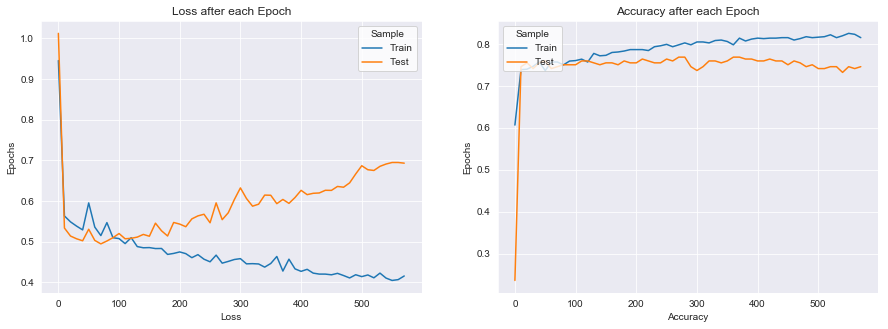

In [26]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Loss after each Epoch')
plt.plot(history.epoch[::10], history.history['loss'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_loss'][::10], label='Test')
plt.legend(['Train', 'Test'],loc='upper right', title='Sample', facecolor='white',fancybox=True)
plt.xlabel('Loss')
plt.ylabel('Epochs')

plt.subplot(1, 2, 2)
plt.title('Accuracy after each Epoch')
plt.plot(history.epoch[::10], history.history['acc'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_acc'][::10], label='Test')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left', title='Sample', facecolor='white', fancybox=True)


plt.savefig('data/results/loss_acc.jpg', quality=100)

## Test Data classification report and confusion matrix

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_target, saved_model.predict_classes(test_features)))
print(confusion_matrix(test_target, saved_model.predict_classes(test_features)))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       165
           1       0.48      0.20      0.28        55

   micro avg       0.75      0.75      0.75       220
   macro avg       0.63      0.56      0.56       220
weighted avg       0.70      0.75      0.70       220

[[153  12]
 [ 44  11]]


## Test Data classification report and confusion matrix

In [20]:
print(classification_report(train_target, saved_model.predict_classes(train_features)))
print(confusion_matrix(train_target, saved_model.predict_classes(train_features)))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       627
           1       0.73      0.27      0.39       252

   micro avg       0.76      0.76      0.76       879
   macro avg       0.75      0.61      0.62       879
weighted avg       0.76      0.76      0.72       879

[[602  25]
 [184  68]]


## 2019 Wimbledon Matches

In [21]:
df_2019 = pd.read_csv('data/wimbledon_2019.csv')
df_raw = pd.read_csv('data/mens/combined_raw_data.csv')

df_2019['Date'] = '2019/07/07'
df_2019['Surface'] = 'Grass'
df_2019['diff_rank'] = df_2019['player_0_rank'] - df_2019['player_1_rank']

## Creating features to make prediction

In [22]:
df_2019 = create_features(df_2019, df_raw)

Creating Player Career Stats All Surface
Creating Player Career Stats on Grass/Clay/Hard
Creating Player Career Stats All Surface Last 52 Weeks
Creating Player Career Stats on Grass/Clay/Hard Last 60 Weeks
Creating Player Head to Head Career Stats All Surface
Creating Player Head to Head Career Stats On Grass
Creating Difference Variables


## Model Predictions
    - Outcome 0 indicates player_0 will win and outcome 1 indicates player_1 will win

In [23]:
features_16 = df_2019[features_list]

df_2019['prediction'] = saved_model.predict_classes(features_16)
df_2019['probability'] = 1 - np.abs(df_2019.prediction - saved_model.predict_proba(features_16).flatten())

df_2019[['Round', 'player_0', 'player_1', 'prediction', 'probability']]

,Round,player_0,player_1,prediction,probability
0,Round of 16,Djokovic N.,Humbert U.,0,0.918732
1,Round of 16,Goffin D.,Verdasco F.,0,0.615318
2,Round of 16,Raonic M.,Pella G.,0,0.844543
3,Round of 16,Bautista Agut R.,Paire B.,0,0.798919
4,Round of 16,Querrey S.,Sandgren T.,0,0.832953
5,Round of 16,Nadal R.,Sousa J.,0,0.920783
6,Round of 16,Nishikori K.,Kukushkin M.,0,0.864669
7,Round of 16,Federer R.,Berrettini M.,0,0.867719
8,Quarter,Djokovic N.,Goffin D.,0,0.815934
9,Quarter,Raonic M.,Bautista Agut R.,1,0.741729
